# Lab_3 TCV3151 Computer Vision
Bagja 9102 Kurniawan <br> **1211501345**

## Preparatory Work

In [1]:
#Mount Google Drive.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#Import the packages.
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Question 1: Contrast Stretching

(Text(0.5, 1.0, 'Histogram for Original Image'), (0.0, 256.0))

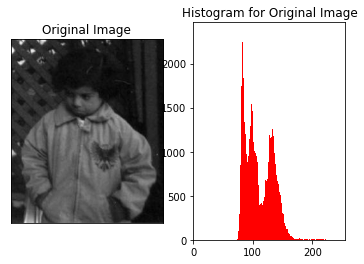

In [3]:
#Read image and histogram.
path = '/content/gdrive/My Drive/TCV3151/Lab_3/'
img = cv2.imread(path+'pout.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray'), plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2)
plt.hist(img.ravel(),256,[0,256],color = 'r') 
plt.title('Histogram for Original Image'), plt.xlim([0,256])

(Text(0.5, 1.0, 'Histogram for Constrast Stretching'), (0.0, 256.0))

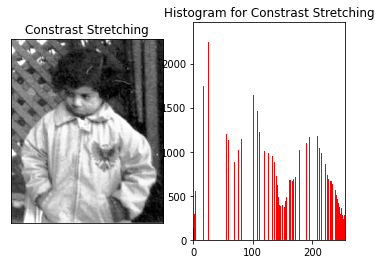

In [4]:
#Apply contrast stretching.
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img_adj = cdf[img]
 
plt.subplot(1,2,1),plt.imshow(img_adj,cmap = 'gray')
plt.title('Constrast Stretching'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.hist(img_adj.ravel(),256,[0,256],color = 'r') 
plt.title('Histogram for Constrast Stretching'), plt.xlim([0,256])

## Question 2: Histogram Equalization

(Text(0.5, 1.0, 'Histogram Equalization'), (0.0, 256.0))

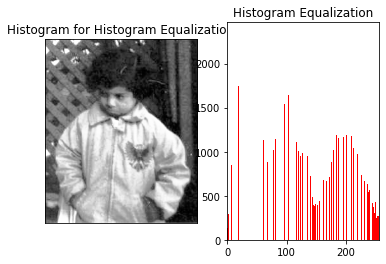

In [5]:
#Apply histogram equalization.
img_equ = cv2.equalizeHist(img)
 
plt.figure(2)
plt.subplot(1,2,1),plt.imshow(img_equ,cmap = 'gray')
plt.title('Histogram for Histogram Equalization'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.hist(img_equ.ravel(),256,[0,256],color = 'r') 
plt.title('Histogram Equalization'), plt.xlim([0,256])

## Question 3: Convolutional Filtering

(-0.5, 193.5, 235.5, -0.5)

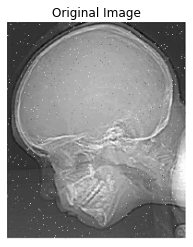

In [6]:
#Read image.
img = cv2.imread(path + 'skull.png', 0)
plt.imshow(img, cmap='gray'),plt.title('Original Image')
plt.axis('off')

(-0.5, 193.5, 235.5, -0.5)

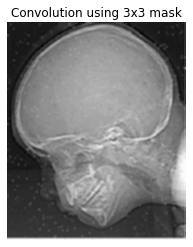

In [7]:
#Blur image using convolution with 3 x 3 mask.
img1 = cv2.blur(img,(3,3))
plt.imshow(img1, cmap='gray'),plt.title('Convolution using 3x3 mask')
plt.axis('off')

(-0.5, 193.5, 235.5, -0.5)

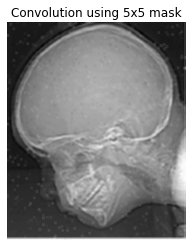

In [8]:
#Blur image using convolution with 5 x 5 mask.
img2 = cv2.blur(img,(5,5))
plt.imshow(img1, cmap='gray'),plt.title('Convolution using 5x5 mask')
plt.axis('off')

## Question 4: Median Filter

(-0.5, 193.5, 235.5, -0.5)

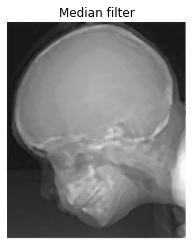

In [9]:
#Apply median filter.
img_median = cv2.medianBlur(img,5)
plt.imshow(img_median, cmap='gray'),plt.title('Median filter')
plt.axis('off')

## Question 5: Image Subtraction

(-0.5, 299.5, 299.5, -0.5)

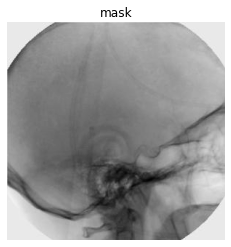

In [10]:
#Read mask image.
mask = cv2.imread(path + 'mask.jpg', 0)
plt.imshow(mask, cmap='gray'),plt.title('mask')
plt.axis('off')

(-0.5, 299.5, 299.5, -0.5)

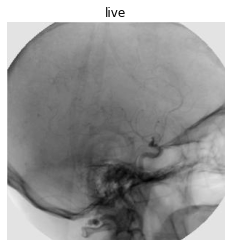

In [11]:
#Read live image.
live = cv2.imread(path + 'live.jpg', 0)
plt.imshow(live, cmap='gray'),plt.title('live')
plt.axis('off')

(<matplotlib.image.AxesImage at 0x7f7800fa0f50>,
 Text(0.5, 1.0, 'Difference Image'),
 (-0.5, 299.5, 299.5, -0.5))

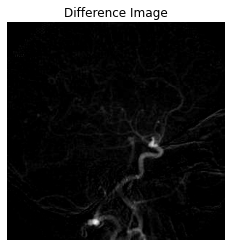

In [12]:
#Apply image subtraction.
diff = cv2.subtract(mask, live)
plt.imshow(diff, cmap='gray'),plt.title('Difference Image'), plt.axis('off')

(Text(0.5, 1.0, 'Histogram for Original Image'), (0.0, 256.0))

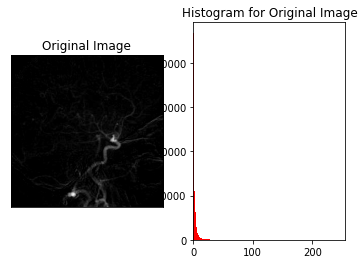

In [13]:
plt.subplot(1,2,1), plt.imshow(diff, cmap='gray'), plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2), plt.hist(diff.ravel(),256,[0,256],color = 'r') 
plt.title('Histogram for Original Image'), plt.xlim([0,256])

(Text(0.5, 1.0, 'Histogram for Constrast Stretching'), (0.0, 256.0))

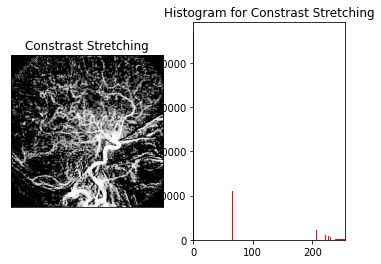

In [14]:
#Apply histogram equalization.
hist,bins = np.histogram(diff.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img_adj = cdf[diff]
 
plt.subplot(1,2,1),plt.imshow(img_adj,cmap = 'gray')
plt.title('Constrast Stretching'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.hist(img_adj.ravel(),256,[0,256],color = 'r') 
plt.title('Histogram for Constrast Stretching'), plt.xlim([0,256])